In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/DSF Project Fall 2021/data

/content/drive/MyDrive/DSF Project Fall 2021/data


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import permutation_test_score as perm_test
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median', add_indicator=True)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDClassifier
import requests
from sklearn.metrics import mean_squared_error
import math
import warnings
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [4]:
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [5]:
warnings.filterwarnings("ignore")

In [6]:
merged_data_df = pd.read_csv('cleaned_merged_seasons.csv')

In [7]:
merged_data_df

,Unnamed: 0,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
1,1,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,7,0,0,0.0,0.0,2016-08-13T14:00:00Z,0,13,Southampton,0,0,0,0,1,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1
2,2,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,6,1,0,0.3,2.0,2016-08-13T14:00:00Z,69,14,Stoke,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,True,1,1
3,3,2016-17,Adam Lallana,MID,NaN,1,2,33,0,33.7,205,8,3,1,14.2,51.2,2016-08-14T15:00:00Z,75,1,Arsenal,0,0,0,0,1,0,155525,4.0,3.0,57.0,11,0,0,0,70,False,1,1
4,4,2016-17,Adrián San Miguel del Castillo,GK,NaN,0,0,16,0,0.0,450,10,2,0,3.0,29.8,2016-08-15T19:00:00Z,90,4,Chelsea,0,0,0,0,1,4,94480,1.0,2.0,0.0,2,0,0,0,50,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69019,69019,2020-21,Aaron Ramsdale,GK,Sheffield Utd,0,2,30,1,10.0,483,376,0,0,3.2,22.0,2021-05-23T15:00:00Z,90,4,Burnley,0,0,0,0,38,3,162985,0.0,1.0,0.0,9,13618,17381,3763,46,True,0,38
69020,69020,2020-21,Adrien Silva,MID,Leicester,0,0,0,0,0.0,220,373,0,0,0.0,0.0,2021-05-23T15:00:00Z,0,17,Spurs,0,0,0,0,38,0,16396,4.0,2.0,0.0,0,-16,0,16,44,True,0,38
69021,69021,2020-21,Sidnei Tavares,MID,Leicester,0,0,0,0,0.0,676,373,0,0,0.0,0.0,2021-05-23T15:00:00Z,0,17,Spurs,0,0,0,0,38,0,337,4.0,2.0,0.0,0,32,60,28,44,True,0,38
69022,69022,2020-21,Kalvin Phillips,MID,Leeds,0,0,17,0,12.8,204,372,1,1,6.1,40.6,2021-05-23T15:00:00Z,90,18,West Brom,0,0,0,0,38,0,74008,1.0,3.0,8.0,6,210,789,579,49,True,1,38


In [8]:
merged_data_df = merged_data_df[merged_data_df.minutes >0]

In [9]:
print(merged_data_df.position.unique())

['MID' 'GK' 'DEF' 'FWD']


In [10]:
gk_player_df = merged_data_df[merged_data_df.position == 'GK']
mid_player_df = merged_data_df[merged_data_df.position == 'MID']
def_player_df = merged_data_df[merged_data_df.position == 'DEF']
fwd_player_df = merged_data_df[merged_data_df.position == 'FWD']

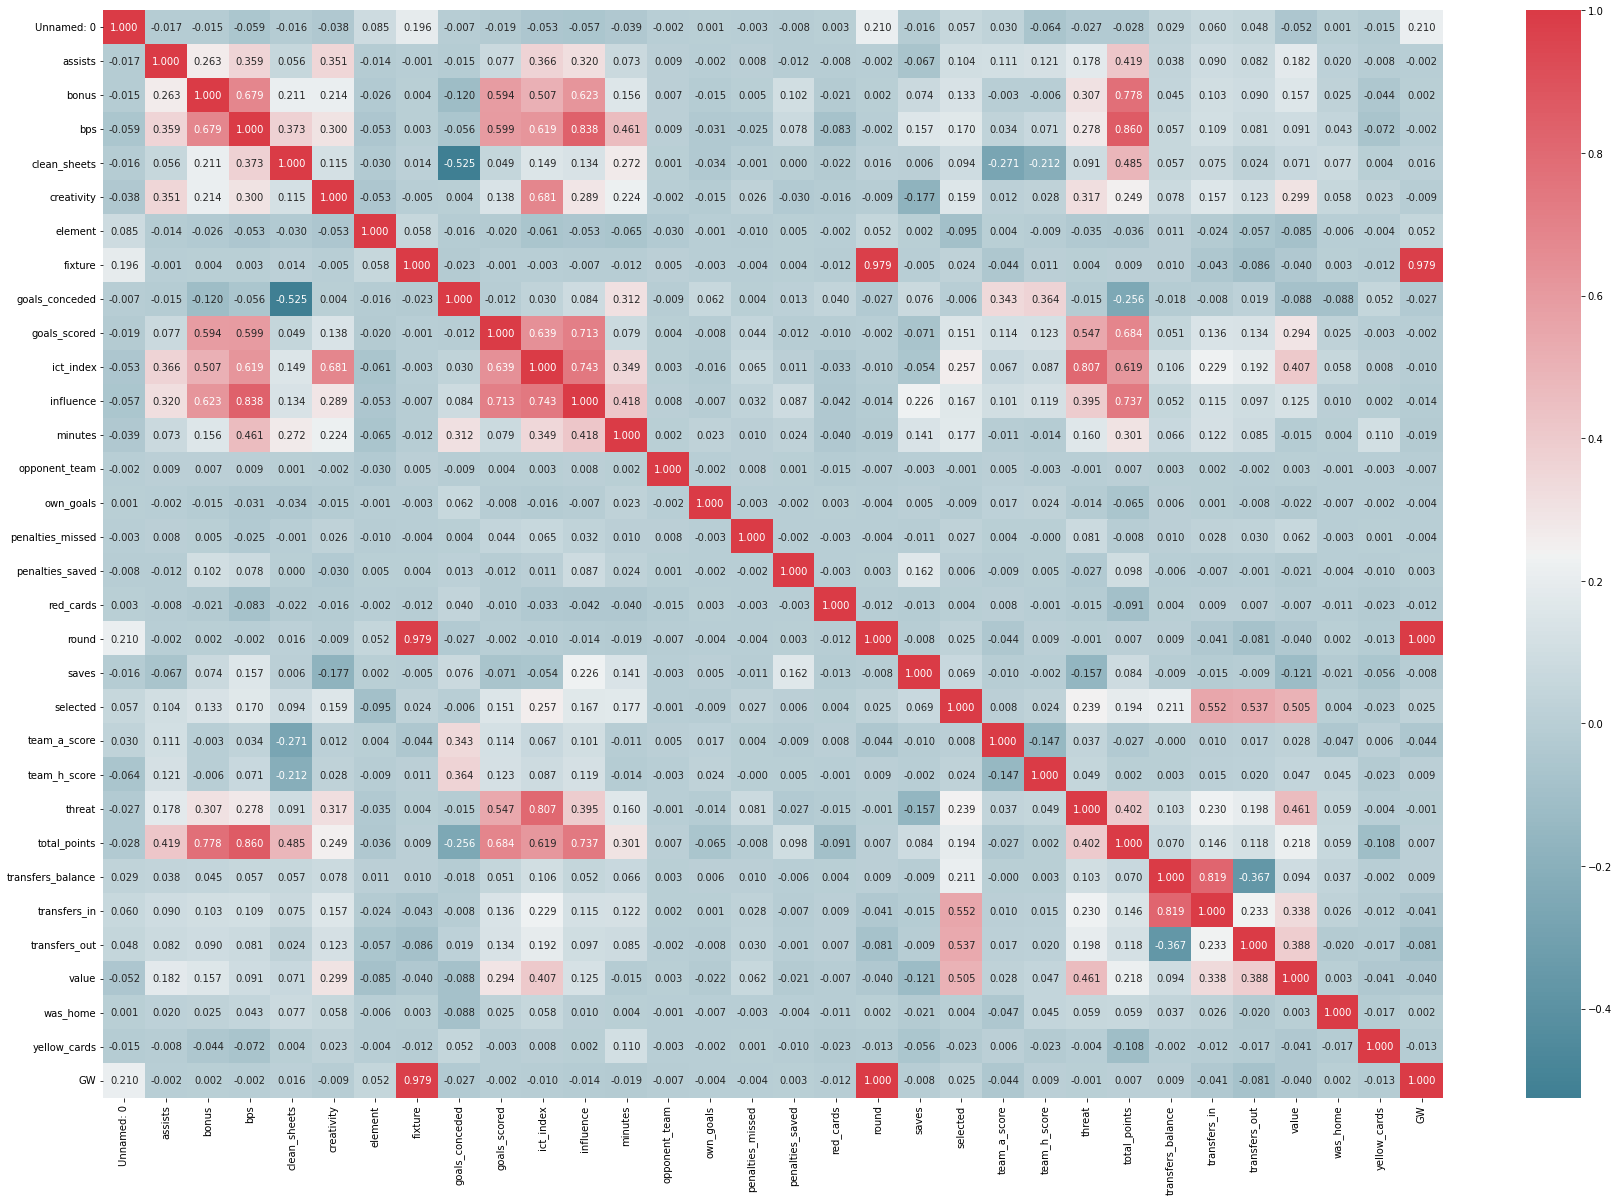

In [11]:
plt.figure(figsize=(30,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(merged_data_df.corr(), dtype='bool')
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=merged_data_df.corr(),annot=True, cmap=cmap, fmt='.3f')

In [12]:
merged_data_df.columns

Index(['Unnamed: 0', 'season_x', 'name', 'position', 'team_x', 'assists',
       'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'fixture',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'opp_team_name',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [13]:
cols = ['total_points','season_x', 'name', 'minutes','xP','bonus','assists','bps','clean_sheets','goals_conceded','goals_scored','ict_index','influence','threat','value','yellow_cards','creativity']

# gk_player_df_new = gk_player_df[['total_points','season_x', 'name', 'minutes','bonus','bps','clean_sheets','goals_conceded','goals_scored','ict_index','influence','threat','value','yellow_cards','creativity']]
# mid_player_df_new = mid_player_df[['total_points','season_x', 'name', 'minutes','bonus','assists','bps','clean_sheets','goals_scored','ict_index','influence','threat','value','yellow_cards','creativity']]
# def_player_df_new = def_player_df[['total_points','season_x', 'name', 'minutes','bonus','assists','bps','clean_sheets','goals_conceded','goals_scored','ict_index','influence','threat','value','yellow_cards','creativity']]
# fwd_player_df_new = fwd_player_df[['total_points','season_x', 'name', 'minutes','bonus','assists','bps','goals_scored','ict_index','influence','threat','value','yellow_cards','creativity']]

gk_player_df_new = gk_player_df[['total_points','season_x', 'name', 'minutes','bonus','bps','clean_sheets','goals_conceded','goals_scored','ict_index','value','yellow_cards','was_home']]
mid_player_df_new = mid_player_df[['total_points','season_x', 'name', 'minutes','bonus','assists','bps','clean_sheets','goals_scored','ict_index','value','yellow_cards','was_home']]
def_player_df_new = def_player_df[['total_points','season_x', 'name', 'minutes','bonus','assists','bps','clean_sheets','goals_conceded','goals_scored','threat','value','yellow_cards','was_home']]
fwd_player_df_new = fwd_player_df[['total_points','season_x', 'name', 'minutes','bonus','assists','bps','goals_scored','ict_index','value','yellow_cards','was_home']]

In [14]:
# gk_player_df_train = gk_player_df_new[~(gk_player_df_new['season_x'] == '2020-21')]
gk_player_df_train = gk_player_df_new[~(gk_player_df_new.season_x.isin(['2015-16','2016-17','2020-21']))]
gk_player_df_test = gk_player_df_new[gk_player_df_new['season_x'] == '2020-21']
mid_player_df_train = mid_player_df_new[~(mid_player_df_new.season_x.isin(['2015-16','2016-17','2020-21']))]
mid_player_df_test = mid_player_df_new[mid_player_df_new['season_x'] == '2020-21']
def_player_df_train = def_player_df_new[~(def_player_df_new.season_x.isin(['2015-16','2016-17','2020-21']))]
def_player_df_test = def_player_df_new[def_player_df_new['season_x'] == '2020-21']
fwd_player_df_train = fwd_player_df_new[~(fwd_player_df_new.season_x.isin(['2015-16','2016-17','2020-21']))]
fwd_player_df_test = fwd_player_df_new[fwd_player_df_new['season_x'] == '2020-21']

In [15]:
gk_player_df_train_att = gk_player_df_train.drop(['season_x', 'name','total_points'], axis=1)
mid_player_df_train_att = mid_player_df_train.drop(['season_x', 'name','total_points'], axis=1)
def_player_df_train_att = def_player_df_train.drop(['season_x', 'name','total_points'], axis=1)
fwd_player_df_train_att = fwd_player_df_train.drop(['season_x', 'name','total_points'], axis=1)

gk_player_df_train_score = gk_player_df_train[['total_points']]
mid_player_df_train_score = mid_player_df_train[['total_points']]
def_player_df_train_score = def_player_df_train[['total_points']]
fwd_player_df_train_score = fwd_player_df_train[['total_points']]

In [16]:
gk_player_df_train_att

,minutes,bonus,bps,clean_sheets,goals_conceded,goals_scored,ict_index,value,yellow_cards,was_home
7379,90,0,22,1,0,0,1.1,55,0,True
7388,90,0,24,1,0,0,1.5,55,0,False
7398,90,0,19,1,0,0,0.1,50,0,True
7410,90,0,28,1,0,0,2.1,55,0,False
7415,90,0,14,0,1,0,2.2,50,0,False
...,...,...,...,...,...,...,...,...,...,...
44506,90,0,12,0,1,0,0.4,47,0,False
44543,90,0,12,0,2,0,1.8,52,0,True
44588,90,0,10,0,2,0,0.6,53,0,False
44637,90,0,10,0,1,0,1.0,49,0,True


In [17]:
gk_player_df_train_score

,total_points
7379,6
7388,6
7398,6
7410,7
7415,3
...,...
44506,2
44543,1
44588,1
44637,2


In [18]:
gk_reg_model = LinearRegression()
gk_reg_model.fit(gk_player_df_train_att, gk_player_df_train_score.total_points)
def_reg_model = LinearRegression()
def_reg_model.fit(def_player_df_train_att, def_player_df_train_score.total_points)
mid_reg_model = LinearRegression()
mid_reg_model.fit(mid_player_df_train_att, mid_player_df_train_score.total_points)
fwd_reg_model = LinearRegression()
fwd_reg_model.fit(fwd_player_df_train_att, fwd_player_df_train_score.total_points)

LinearRegression()

In [19]:
gk_reg_model_lasso = Lasso(alpha=1.0)
gk_reg_model_lasso.fit(gk_player_df_train_att, gk_player_df_train_score.total_points)
def_reg_model_lasso = Lasso(alpha=1.0)
def_reg_model_lasso.fit(def_player_df_train_att, def_player_df_train_score.total_points)
mid_reg_model_lasso = Lasso(alpha=1.0)
mid_reg_model_lasso.fit(mid_player_df_train_att, mid_player_df_train_score.total_points)
fwd_reg_model_lasso = Lasso(alpha=1.0)
fwd_reg_model_lasso.fit(fwd_player_df_train_att, fwd_player_df_train_score.total_points)

Lasso()

In [20]:
gk_reg_model_ridge = Ridge(alpha=1.0)
gk_reg_model_ridge.fit(gk_player_df_train_att, gk_player_df_train_score.total_points)
def_reg_model_ridge = Ridge(alpha=1.0)
def_reg_model_ridge.fit(def_player_df_train_att, def_player_df_train_score.total_points)
mid_reg_model_ridge = Ridge(alpha=1.0)
mid_reg_model_ridge.fit(mid_player_df_train_att, mid_player_df_train_score.total_points)
fwd_reg_model_ridge = Ridge(alpha=1.0)
fwd_reg_model_ridge.fit(fwd_player_df_train_att, fwd_player_df_train_score.total_points)

Ridge()

In [21]:
gk_reg_model_rf = RandomForestRegressor(n_estimators=30, max_depth=15, criterion='mse')
gk_reg_model_rf.fit(gk_player_df_train_att, gk_player_df_train_score.total_points)
def_reg_model_rf = RandomForestRegressor(n_estimators=30, max_depth=15, criterion='mse')
def_reg_model_rf.fit(def_player_df_train_att, def_player_df_train_score.total_points)
mid_reg_model_rf = RandomForestRegressor(n_estimators=30, max_depth=15, criterion='mse')
mid_reg_model_rf.fit(mid_player_df_train_att, mid_player_df_train_score.total_points)
fwd_reg_model_rf = RandomForestRegressor(n_estimators=30, max_depth=15, criterion='mse')
fwd_reg_model_rf.fit(fwd_player_df_train_att, fwd_player_df_train_score.total_points)

RandomForestRegressor(criterion='mse', max_depth=15, n_estimators=30)

In [22]:
from xgboost import XGBRegressor
gk_reg_model_xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
gk_reg_model_xgb.fit(gk_player_df_train_att, gk_player_df_train_score.total_points)
def_reg_model_xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
def_reg_model_xgb.fit(def_player_df_train_att, def_player_df_train_score.total_points)
mid_reg_model_xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
mid_reg_model_xgb.fit(mid_player_df_train_att, mid_player_df_train_score.total_points)
fwd_reg_model_xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
fwd_reg_model_xgb.fit(fwd_player_df_train_att, fwd_player_df_train_score.total_points)

[21:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, eta=0.1, max_depth=7, n_estimators=1000,
             subsample=0.7)

In [23]:
gk_player_df_train_att_temp = gk_player_df_train_att.reset_index()
gk_player_df_train_att_temp = gk_player_df_train_att_temp.drop('index', axis = 1)
gk_player_df_train_score_temp = gk_player_df_train_score[['total_points']]
gk_player_df_train_score_temp = gk_player_df_train_score_temp.reset_index()
gk_player_df_train_score_temp = gk_player_df_train_score_temp[['total_points']]
gk_player_df_train_att_temp

,minutes,bonus,bps,clean_sheets,goals_conceded,goals_scored,ict_index,value,yellow_cards,was_home
0,90,0,22,1,0,0,1.1,55,0,True
1,90,0,24,1,0,0,1.5,55,0,False
2,90,0,19,1,0,0,0.1,50,0,True
3,90,0,28,1,0,0,2.1,55,0,False
4,90,0,14,0,1,0,2.2,50,0,False
...,...,...,...,...,...,...,...,...,...,...
1758,90,0,12,0,1,0,0.4,47,0,False
1759,90,0,12,0,2,0,1.8,52,0,True
1760,90,0,10,0,2,0,0.6,53,0,False
1761,90,0,10,0,1,0,1.0,49,0,True


In [24]:
X_train = gk_player_df_train_att_temp
y_train = gk_player_df_train_score_temp

Xscaler = MinMaxScaler(feature_range=(0, 1))
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train)
scaled_y_train = Yscaler.transform(y_train)
scaled_y_train = scaled_y_train.reshape(-1)

scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

n_input = 25
n_features= X_train.shape[1]
b_size = 32
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator,epochs=5)

Epoch 1/5
55/55 [==============================] - 4s 36ms/step - loss: 0.0327
Epoch 2/5
55/55 [==============================] - 2s 36ms/step - loss: 0.0106
Epoch 3/5
55/55 [==============================] - 2s 33ms/step - loss: 0.0032
Epoch 4/5
55/55 [==============================] - 2s 34ms/step - loss: 0.0018
Epoch 5/5
55/55 [==============================] - 2s 38ms/step - loss: 0.0016


In [25]:
gk_player_df_test_att = gk_player_df_test.drop(['season_x', 'name','total_points'], axis=1)
gk_player_df_test_att_temp = gk_player_df_test_att.reset_index()
gk_player_df_test_att_temp = gk_player_df_test_att_temp.drop('index', axis=1)
gk_player_df_test_att_temp

,minutes,bonus,bps,clean_sheets,goals_conceded,goals_scored,ict_index,value,yellow_cards,was_home
0,90,0,12,0,2,0,1.8,50,0,True
1,90,0,17,0,1,0,2.3,45,0,False
2,90,0,9,0,3,0,0.4,60,0,True
3,90,1,29,1,0,0,1.4,50,0,False
4,90,0,15,0,1,0,2.0,55,0,True
...,...,...,...,...,...,...,...,...,...,...
760,90,0,13,0,1,0,1.1,40,0,False
761,90,1,27,1,0,0,0.9,50,0,True
762,90,0,42,1,0,0,4.7,61,0,True
763,90,2,32,1,0,0,4.4,50,0,True


In [26]:
X_test = gk_player_df_test_att_temp
scaled_X_test = Xscaler.transform(X_test)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)

y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_pred':y_pred.ravel()})
results

,y_pred
0,2.575569
1,2.482674
2,1.906282
3,1.710794
4,2.355796
...,...
735,2.674182
736,1.914589
737,7.076660
738,7.493263


In [27]:
gk_player_df_test_temp2 = gk_player_df_test
gk_player_df_test_temp2 = gk_player_df_test_temp2.reset_index()
gk_player_df_test_temp2 = gk_player_df_test_temp2.drop('index', axis=1)
gk_player_df_test_temp2['predicted_scores_rnn'] = results['y_pred']
gk_player_df_test_temp2

,total_points,season_x,name,minutes,bonus,bps,clean_sheets,goals_conceded,goals_scored,ict_index,value,yellow_cards,was_home,predicted_scores_rnn
0,1,2020-21,Aaron Ramsdale,90,0,12,0,2,0,1.8,50,0,True,2.575569
1,2,2020-21,Alex McCarthy,90,0,17,0,1,0,2.3,45,0,False,2.482674
2,1,2020-21,Alisson Ramses Becker,90,0,9,0,3,0,0.4,60,0,True,1.906282
3,7,2020-21,Bernd Leno,90,1,29,1,0,0,1.4,50,0,False,1.710794
4,3,2020-21,Hugo Lloris,90,0,15,0,1,0,2.0,55,0,True,2.355796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,2,2020-21,Will Norris,90,0,13,0,1,0,1.1,40,0,False,NaN
761,7,2020-21,Bernd Leno,90,1,27,1,0,0,0.9,50,0,True,NaN
762,12,2020-21,Ederson Santana de Moraes,90,0,42,1,0,0,4.7,61,0,True,NaN
763,9,2020-21,Lukasz Fabianski,90,2,32,1,0,0,4.4,50,0,True,NaN


In [28]:
gk_player_df_test_temp2['predicted_scores_rnn'] = gk_player_df_test_temp2['predicted_scores_rnn'].fillna(0)
gk_player_df_test_temp2['predicted_scores_rnn_rmse'] = math.sqrt(mean_squared_error(gk_player_df_test_temp2['total_points'], gk_player_df_test_temp2['predicted_scores_rnn']))
gk_player_df_test_temp2

,total_points,season_x,name,minutes,bonus,bps,clean_sheets,goals_conceded,goals_scored,ict_index,value,yellow_cards,was_home,predicted_scores_rnn,predicted_scores_rnn_rmse
0,1,2020-21,Aaron Ramsdale,90,0,12,0,2,0,1.8,50,0,True,2.575569,4.026219
1,2,2020-21,Alex McCarthy,90,0,17,0,1,0,2.3,45,0,False,2.482674,4.026219
2,1,2020-21,Alisson Ramses Becker,90,0,9,0,3,0,0.4,60,0,True,1.906282,4.026219
3,7,2020-21,Bernd Leno,90,1,29,1,0,0,1.4,50,0,False,1.710794,4.026219
4,3,2020-21,Hugo Lloris,90,0,15,0,1,0,2.0,55,0,True,2.355796,4.026219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,2,2020-21,Will Norris,90,0,13,0,1,0,1.1,40,0,False,0.000000,4.026219
761,7,2020-21,Bernd Leno,90,1,27,1,0,0,0.9,50,0,True,0.000000,4.026219
762,12,2020-21,Ederson Santana de Moraes,90,0,42,1,0,0,4.7,61,0,True,0.000000,4.026219
763,9,2020-21,Lukasz Fabianski,90,2,32,1,0,0,4.4,50,0,True,0.000000,4.026219


In [29]:
gk_player_df_test_att = gk_player_df_test.drop(['season_x', 'name','total_points'], axis=1)
mid_player_df_test_att = mid_player_df_test.drop(['season_x', 'name','total_points'], axis=1)
def_player_df_test_att = def_player_df_test.drop(['season_x', 'name','total_points'], axis=1)
fwd_player_df_test_att = fwd_player_df_test.drop(['season_x', 'name','total_points'], axis=1)

In [30]:
gk_player_df_test['predicted_scores_lin'] = gk_reg_model.predict(gk_player_df_test_att)
def_player_df_test['predicted_scores_lin'] = def_reg_model.predict(def_player_df_test_att)
mid_player_df_test['predicted_scores_lin'] = mid_reg_model.predict(mid_player_df_test_att)
fwd_player_df_test['predicted_scores_lin'] = fwd_reg_model.predict(fwd_player_df_test_att)

In [31]:
gk_player_df_test['predicted_scores_lasso'] = gk_reg_model_lasso.predict(gk_player_df_test_att)
def_player_df_test['predicted_scores_lasso'] = def_reg_model_lasso.predict(def_player_df_test_att)
mid_player_df_test['predicted_scores_lasso'] = mid_reg_model_lasso.predict(mid_player_df_test_att)
fwd_player_df_test['predicted_scores_lasso'] = fwd_reg_model_lasso.predict(fwd_player_df_test_att)

In [32]:
gk_player_df_test['predicted_scores_ridge'] = gk_reg_model_ridge.predict(gk_player_df_test_att)
def_player_df_test['predicted_scores_ridge'] = def_reg_model_ridge.predict(def_player_df_test_att)
mid_player_df_test['predicted_scores_ridge'] = mid_reg_model_ridge.predict(mid_player_df_test_att)
fwd_player_df_test['predicted_scores_ridge'] = fwd_reg_model_ridge.predict(fwd_player_df_test_att)

In [33]:
gk_player_df_test['predicted_scores_rf'] = gk_reg_model_rf.predict(gk_player_df_test_att)
def_player_df_test['predicted_scores_rf'] = def_reg_model_rf.predict(def_player_df_test_att)
mid_player_df_test['predicted_scores_rf'] = mid_reg_model_rf.predict(mid_player_df_test_att)
fwd_player_df_test['predicted_scores_rf'] = fwd_reg_model_rf.predict(fwd_player_df_test_att)

In [34]:
gk_player_df_test['predicted_scores_xgb'] = gk_reg_model_xgb.predict(gk_player_df_test_att)
def_player_df_test['predicted_scores_xgb'] = def_reg_model_xgb.predict(def_player_df_test_att)
mid_player_df_test['predicted_scores_xgb'] = mid_reg_model_xgb.predict(mid_player_df_test_att)
fwd_player_df_test['predicted_scores_xgb'] = fwd_reg_model_xgb.predict(fwd_player_df_test_att)

In [35]:
gk_player_df_test['predicted_scores_lin_rmse'] = math.sqrt(mean_squared_error(gk_player_df_test['total_points'], gk_player_df_test['predicted_scores_lin']))
def_player_df_test['predicted_scores_lin_rmse'] = math.sqrt(mean_squared_error(def_player_df_test['total_points'], def_player_df_test['predicted_scores_lin']))
mid_player_df_test['predicted_scores_lin_rmse'] = math.sqrt(mean_squared_error(mid_player_df_test['total_points'], mid_player_df_test['predicted_scores_lin']))
fwd_player_df_test['predicted_scores_lin_rmse'] = math.sqrt(mean_squared_error(fwd_player_df_test['total_points'], fwd_player_df_test['predicted_scores_lin']))

In [36]:
gk_player_df_test['predicted_scores_lasso_rmse'] = math.sqrt(mean_squared_error(gk_player_df_test['total_points'], gk_player_df_test['predicted_scores_lasso']))
def_player_df_test['predicted_scores_lasso_rmse'] = math.sqrt(mean_squared_error(def_player_df_test['total_points'], def_player_df_test['predicted_scores_lasso']))
mid_player_df_test['predicted_scores_lasso_rmse'] = math.sqrt(mean_squared_error(mid_player_df_test['total_points'], mid_player_df_test['predicted_scores_lasso']))
fwd_player_df_test['predicted_scores_lasso_rmse'] = math.sqrt(mean_squared_error(fwd_player_df_test['total_points'], fwd_player_df_test['predicted_scores_lasso']))

In [37]:
gk_player_df_test['predicted_scores_ridge_rmse'] = math.sqrt(mean_squared_error(gk_player_df_test['total_points'], gk_player_df_test['predicted_scores_ridge']))
def_player_df_test['predicted_scores_ridge_rmse'] = math.sqrt(mean_squared_error(def_player_df_test['total_points'], def_player_df_test['predicted_scores_ridge']))
mid_player_df_test['predicted_scores_ridge_rmse'] = math.sqrt(mean_squared_error(mid_player_df_test['total_points'], mid_player_df_test['predicted_scores_ridge']))
fwd_player_df_test['predicted_scores_ridge_rmse'] = math.sqrt(mean_squared_error(fwd_player_df_test['total_points'], fwd_player_df_test['predicted_scores_ridge']))

In [38]:
gk_player_df_test['predicted_scores_rf_rmse'] = math.sqrt(mean_squared_error(gk_player_df_test['total_points'], gk_player_df_test['predicted_scores_rf']))
def_player_df_test['predicted_scores_rf_rmse'] = math.sqrt(mean_squared_error(def_player_df_test['total_points'], def_player_df_test['predicted_scores_rf']))
mid_player_df_test['predicted_scores_rf_rmse'] = math.sqrt(mean_squared_error(mid_player_df_test['total_points'], mid_player_df_test['predicted_scores_rf']))
fwd_player_df_test['predicted_scores_rf_rmse'] = math.sqrt(mean_squared_error(fwd_player_df_test['total_points'], fwd_player_df_test['predicted_scores_rf']))

In [39]:
gk_player_df_test['predicted_scores_xgb_rmse'] = math.sqrt(mean_squared_error(gk_player_df_test['total_points'], gk_player_df_test['predicted_scores_xgb']))
def_player_df_test['predicted_scores_xgb_rmse'] = math.sqrt(mean_squared_error(def_player_df_test['total_points'], def_player_df_test['predicted_scores_xgb']))
mid_player_df_test['predicted_scores_xgb_rmse'] = math.sqrt(mean_squared_error(mid_player_df_test['total_points'], mid_player_df_test['predicted_scores_xgb']))
fwd_player_df_test['predicted_scores_xgb_rmse'] = math.sqrt(mean_squared_error(fwd_player_df_test['total_points'], fwd_player_df_test['predicted_scores_xgb']))

In [40]:
avg_rmse_lin = (gk_player_df_test['predicted_scores_lin_rmse'].unique()[0] + def_player_df_test['predicted_scores_lin_rmse'].unique()[0] + mid_player_df_test['predicted_scores_lin_rmse'].unique()[0] + fwd_player_df_test['predicted_scores_lin_rmse'].unique()[0]) / 4
avg_rmse_lasso = (gk_player_df_test['predicted_scores_lasso_rmse'].unique()[0] + def_player_df_test['predicted_scores_lasso_rmse'].unique()[0] + mid_player_df_test['predicted_scores_lasso_rmse'].unique()[0] + fwd_player_df_test['predicted_scores_lasso_rmse'].unique()[0]) / 4
avg_rmse_ridge = (gk_player_df_test['predicted_scores_ridge_rmse'].unique()[0] + def_player_df_test['predicted_scores_ridge_rmse'].unique()[0] + mid_player_df_test['predicted_scores_ridge_rmse'].unique()[0] + fwd_player_df_test['predicted_scores_ridge_rmse'].unique()[0]) / 4
avg_rmse_rf = (gk_player_df_test['predicted_scores_rf_rmse'].unique()[0] + def_player_df_test['predicted_scores_rf_rmse'].unique()[0] + mid_player_df_test['predicted_scores_rf_rmse'].unique()[0] + fwd_player_df_test['predicted_scores_rf_rmse'].unique()[0]) / 4
avg_rmse_xgb = (gk_player_df_test['predicted_scores_xgb_rmse'].unique()[0] + def_player_df_test['predicted_scores_xgb_rmse'].unique()[0] + mid_player_df_test['predicted_scores_xgb_rmse'].unique()[0] + fwd_player_df_test['predicted_scores_xgb_rmse'].unique()[0]) / 4

In [41]:
print('Average RMSE for linear regression is :' + str(avg_rmse_lin))
print('Average RMSE for lasso regression is :' + str(avg_rmse_lasso))
print('Average RMSE for ridge regression is :' + str(avg_rmse_ridge))
print('Average RMSE for random forest regression is :' + str(avg_rmse_rf))
print('Average RMSE for XGBoost is :' + str(avg_rmse_xgb))

Average RMSE for linear regression is :0.387589608987722
Average RMSE for lasso regression is :1.2249851020234939
Average RMSE for ridge regression is :0.3874303151107488
Average RMSE for random forest regression is :0.37461664495108576
Average RMSE for XGBoost is :0.36815347713382796


In [42]:
temp123 = mid_player_df_test[mid_player_df_test['name'].str.contains('Salah')]
temp123 = temp123[['total_points','predicted_scores_lin', 'predicted_scores_rf', 'predicted_scores_lasso', 'predicted_scores_xgb']]
temp123

,total_points,predicted_scores_lin,predicted_scores_rf,predicted_scores_lasso,predicted_scores_xgb
44960,20,19.487064,21.866667,17.769824,20.835621
45468,3,3.037574,2.900000,4.663505,3.195591
46019,5,4.874311,5.000000,5.639212,5.060116
46576,13,12.754331,14.100000,14.240414,14.434593
47150,7,6.661106,6.866667,7.114033,7.075186
47470,2,1.677541,1.200000,0.918318,1.496223
48060,8,7.665144,7.600000,6.902505,7.737397
48659,9,8.600633,8.300000,6.183366,8.445910
49860,6,5.577422,5.800000,4.108376,5.581863
50448,14,13.956597,14.066667,11.619150,13.947085


In [43]:
#Trying RNN for a single player - Salah
merged_data_df_salah = merged_data_df[merged_data_df['name'].str.contains('Salah')]
merged_data_df_salah.season_x.unique()
# print(merged_data_df_salah[merged_data_df_salah['name'].str.contains('Salah')])

array(['2017-18', '2018-19', '2019-20', '2020-21'], dtype=object)

In [44]:
salah_player_df_new = merged_data_df_salah[['total_points','season_x', 'name', 'minutes','bonus','bps','clean_sheets','goals_conceded','goals_scored','ict_index','value','yellow_cards']]
salah_player_df_train = salah_player_df_new[(salah_player_df_new.season_x.isin(['2019-20','2018-19',]))]
salah_player_df_test = salah_player_df_new[salah_player_df_new['season_x'] == '2020-21']
salah_player_df_train_att = salah_player_df_train.drop(['season_x', 'name','total_points'], axis=1)
salah_player_df_train_score = salah_player_df_train[['total_points']]

salah_player_df_train_att_temp = salah_player_df_train_att.reset_index()
salah_player_df_train_att_temp = salah_player_df_train_att_temp.drop('index', axis = 1)
salah_player_df_train_score_temp = salah_player_df_train_score[['total_points']]
salah_player_df_train_score_temp = salah_player_df_train_score_temp.reset_index()
salah_player_df_train_score_temp = salah_player_df_train_score_temp[['total_points']]


X_train2 = salah_player_df_train_att_temp
y_train2 = salah_player_df_train_score_temp

Xscaler2 = MinMaxScaler(feature_range=(0, 1))
Xscaler2.fit(X_train2)
scaled_X_train2 = Xscaler2.transform(X_train2)
Yscaler2 = MinMaxScaler(feature_range=(0, 1))
Yscaler2.fit(y_train2)
scaled_y_train2 = Yscaler2.transform(y_train2)
scaled_y_train2 = scaled_y_train2.reshape(-1)

scaled_y_train2 = np.insert(scaled_y_train2, 0, 0)
scaled_y_train2 = np.delete(scaled_y_train2, -1)

n_input = 4
n_features= X_train2.shape[1]
b_size = 8
generator2 = TimeseriesGenerator(scaled_X_train2, scaled_y_train2, length=n_input, batch_size=b_size)

x_train2_input_size = X_train2.shape[0]
model2 = Sequential()
model2.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

# model2 = Sequential()
# model2.add(LSTM(x_train2_input_size, return_sequences=True, input_shape=(n_input, n_features)))
# model2.add(LSTM(x_train2_input_size))
# model2.add(Dense(1))
# model2.compile(optimizer='adam', loss='mse')

model2.fit_generator(generator2, epochs=25)

salah_player_df_test_att = salah_player_df_test.drop(['season_x', 'name','total_points'], axis=1)
salah_player_df_test_att_temp = salah_player_df_test_att.reset_index()
salah_player_df_test_att_temp = salah_player_df_test_att_temp.drop('index', axis=1)
salah_player_df_test_att_temp

X_test2 = salah_player_df_test_att_temp
scaled_X_test2 = Xscaler2.transform(X_test2)
test_generator2 = TimeseriesGenerator(scaled_X_test2, np.zeros(len(X_test2)), length=n_input, batch_size=b_size)

y_pred_scaled2 = model2.predict(test_generator2)
y_pred2 = Yscaler2.inverse_transform(y_pred_scaled2)
results2 = pd.DataFrame({'y_pred':y_pred2.ravel()})


salah_player_df_test_temp2 = salah_player_df_test
salah_player_df_test_temp2 = salah_player_df_test_temp2.reset_index()
salah_player_df_test_temp2 = salah_player_df_test_temp2.drop('index', axis=1)
salah_player_df_test_temp2['predicted_scores_rnn'] = results2['y_pred']
salah_player_df_test_temp2['predicted_scores_rnn'] = salah_player_df_test_temp2['predicted_scores_rnn'].fillna(0)
salah_player_df_test_temp2['predicted_scores_rnn_rmse'] = math.sqrt(mean_squared_error(salah_player_df_test_temp2['total_points'], salah_player_df_test_temp2['predicted_scores_rnn']))
salah_player_df_test_temp2

Epoch 1/25
9/9 [==============================] - 1s 8ms/step - loss: 0.0684
Epoch 2/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0520
Epoch 3/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 4/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0426
Epoch 5/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0369
Epoch 6/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0308
Epoch 7/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0239
Epoch 8/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0167
Epoch 9/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 10/25
9/9 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 11/25
9/9 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 12/25
9/9 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 13/25
9/9 [==============================] - 0s 9ms/step - loss: 0

,total_points,season_x,name,minutes,bonus,bps,clean_sheets,goals_conceded,goals_scored,ict_index,value,yellow_cards,predicted_scores_rnn,predicted_scores_rnn_rmse
0,20,2020-21,Mohamed Salah,90,3,69,0,3,3,32.8,120,0,13.599308,4.911971
1,3,2020-21,Mohamed Salah,90,0,14,1,0,0,12.8,120,0,6.583585,4.911971
2,5,2020-21,Mohamed Salah,90,0,18,0,1,0,7.8,121,0,2.440371,4.911971
3,13,2020-21,Mohamed Salah,90,1,54,0,7,2,16.4,122,0,8.034007,4.911971
4,7,2020-21,Mohamed Salah,90,0,24,0,2,1,16.5,123,0,9.270620,4.911971
5,2,2020-21,Mohamed Salah,90,0,-2,0,1,0,9.7,123,0,4.086452,4.911971
6,8,2020-21,Mohamed Salah,89,1,23,0,1,1,11.0,124,0,12.854615,4.911971
7,9,2020-21,Mohamed Salah,90,2,20,0,1,1,11.3,124,0,7.023025,4.911971
8,6,2020-21,Mohamed Salah,63,0,11,1,0,0,3.4,122,0,5.541329,4.911971
9,14,2020-21,Mohamed Salah,90,3,43,1,0,1,10.9,122,0,12.500830,4.911971


In [45]:
X_train.shape

(1763, 10)

In [46]:
merged_data_df_2122 = pd.read_csv('merged_gw_2122.csv')
merged_data_df_2122

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Eric Bailly,DEF,Man Utd,0.0,0,0,0,0,0.0,286,6,0,0,0.0,0.0,2021-08-14T11:30:00Z,0,10,0,0,0,0,1,0,9363,1,5,0.0,0,0,0,0,50,True,0,1
1,Keinan Davis,FWD,Aston Villa,0.4,0,0,0,0,0.0,49,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,18,0,0,0,0,1,0,169789,2,3,0.0,0,0,0,0,45,False,0,1
2,Ayotomiwa Dele-Bashiru,MID,Watford,0.0,0,0,0,0,0.0,394,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,2,0,0,0,0,1,0,4092,2,3,0.0,0,0,0,0,45,True,0,1
3,James Ward-Prowse,MID,Southampton,2.3,0,0,20,0,30.5,341,4,3,0,5.2,21.6,2021-08-14T14:00:00Z,90,8,0,0,0,0,1,0,299682,1,3,0.0,2,0,0,0,65,False,0,1
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,6,1,3,20.1,106.2,2021-08-14T11:30:00Z,90,10,0,0,0,0,1,0,3381004,1,5,59.0,20,0,0,0,120,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7234,Wilfred Ndidi,MID,Leicester,-0.2,0,0,7,0,1.7,216,113,3,0,1.3,11.0,2021-11-20T12:30:00Z,90,6,0,0,0,0,12,0,77670,3,0,0.0,2,492,2230,1738,48,True,0,12
7235,Matt Ritchie,DEF,Newcastle,1.3,1,0,22,0,44.7,292,116,3,0,7.5,30.6,2021-11-20T15:00:00Z,90,3,0,0,0,0,12,0,22693,3,3,0.0,4,2632,4023,1391,49,True,0,12
7236,Nathan Redmond,MID,Southampton,2.5,0,0,0,0,0.0,336,117,0,0,0.0,0.0,2021-11-20T15:00:00Z,0,15,0,0,0,0,12,0,24704,1,2,0.0,0,-8325,1335,9660,59,False,0,12
7237,Mathew Ryan,GK,Brighton,0.0,0,0,0,0,0.0,65,111,0,0,0.0,0.0,2021-11-20T15:00:00Z,0,2,0,0,0,0,12,0,673,0,2,0.0,0,-13,0,13,45,False,0,12


# Visualizations - 30Nov


In [47]:
final_predicted_scores_df = pd.read_pickle('final_predicted_scores_df_nov_30.pkl')

In [48]:
final_predicted_scores_df

,name,assists,goals_scored,goals_conceded,ict_index,influence,creativity,threat,value,saves,minutes,penalties_saved,bonus,yellow_cards,red_cards,clean_sheets,bps,position,total_points,predicted_score_rf,team,real_points
0,Adrián San Miguel del Castillo,0.0,0.0,2.092501,0.0,0.0,0.0,0.0,45.0,2.601501,78.447533,0.000000,0.0,1.0,0.0,0.0,12.0,GK,0.0,1.278333,Liverpool,0.0
1,David de Gea,0.0,0.0,1.008346,1.3,13.2,0.0,0.0,50.0,2.128800,80.005715,0.000000,1.0,0.0,0.0,1.0,16.0,GK,2.0,5.460000,Man Utd,2.0
2,Fraser Forster,0.0,0.0,1.205943,0.0,0.0,0.0,0.0,45.0,1.968972,68.200692,0.076339,0.0,0.0,0.0,0.0,4.5,GK,0.0,2.686667,Southampton,0.0
3,Hugo Lloris,0.0,0.0,1.098763,3.2,31.8,0.0,0.0,55.0,3.154852,89.006861,0.017579,0.0,0.0,0.0,1.0,3.0,GK,10.0,4.853333,Spurs,10.0
4,Kasper Schmeichel,0.0,0.0,1.264840,2.6,26.0,0.0,0.0,50.0,2.440746,89.961197,0.015237,0.0,0.0,0.0,0.0,6.0,GK,9.0,2.730000,Leicester,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Maxwell Haygarth,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,45.0,0.000000,45.000000,0.000000,0.0,0.0,0.0,0.0,0.0,MID,0.0,0.000000,Brentford,0.0
626,Tyler Onyango,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,45.0,0.000000,45.000000,0.000000,0.0,0.0,0.0,0.0,0.0,MID,0.0,0.000000,Everton,0.0
627,Kaide Gordon,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,45.0,0.000000,45.000000,0.000000,0.0,0.0,0.0,0.0,0.0,MID,0.0,0.000000,Liverpool,0.0
628,Jack Jenkins,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,45.0,0.000000,45.000000,0.000000,0.0,0.0,0.0,0.0,0.0,MID,0.0,0.000000,Leeds,0.0


In [49]:
merged_gw_2122 = pd.read_csv('merged_gw_2122.csv')
merged_gw_2122_copy = merged_gw_2122.copy()
merged_gw_2122['value'] = merged_gw_2122['value']/10
merged_gw_2122['total_points'] = np.abs(merged_gw_2122['total_points'])
merged_gw_2122 = merged_gw_2122.groupby('name').agg({'total_points':'sum', 'value':'mean', 'position': 'first','name':'first'})
merged_gw_2122['roi'] = merged_gw_2122['total_points']/merged_gw_2122['value']

In [50]:
merged_gw_2122_top5_gk = merged_gw_2122[merged_gw_2122['position'] == 'GK']
merged_gw_2122_top5_def = merged_gw_2122[merged_gw_2122['position'] == 'DEF']
merged_gw_2122_top5_fwd = merged_gw_2122[merged_gw_2122['position'] == 'FWD']
merged_gw_2122_top5_mid = merged_gw_2122[merged_gw_2122['position'] == 'MID']

In [51]:
merged_gw_2122_top5_gk = merged_gw_2122_top5_gk.nlargest(5, 'roi')
merged_gw_2122_top5_def = merged_gw_2122_top5_def.nlargest(5, 'roi')
merged_gw_2122_top5_fwd = merged_gw_2122_top5_fwd.nlargest(5, 'roi')
merged_gw_2122_top5_mid = merged_gw_2122_top5_mid.nlargest(5, 'roi')

In [52]:
merged_gw_2122_top5_mid

,total_points,value,position,name,roi
name,,,,,
Conor Gallagher,67,5.633333,MID,Conor Gallagher,11.893491
Emile Smith Rowe,59,5.458333,MID,Emile Smith Rowe,10.809160
Mohamed Salah,125,12.683333,MID,Mohamed Salah,9.855453
Andros Townsend,54,5.541667,MID,Andros Townsend,9.744361
Pierre-Emile Højbjerg,46,4.941667,MID,Pierre-Emile Højbjerg,9.308600


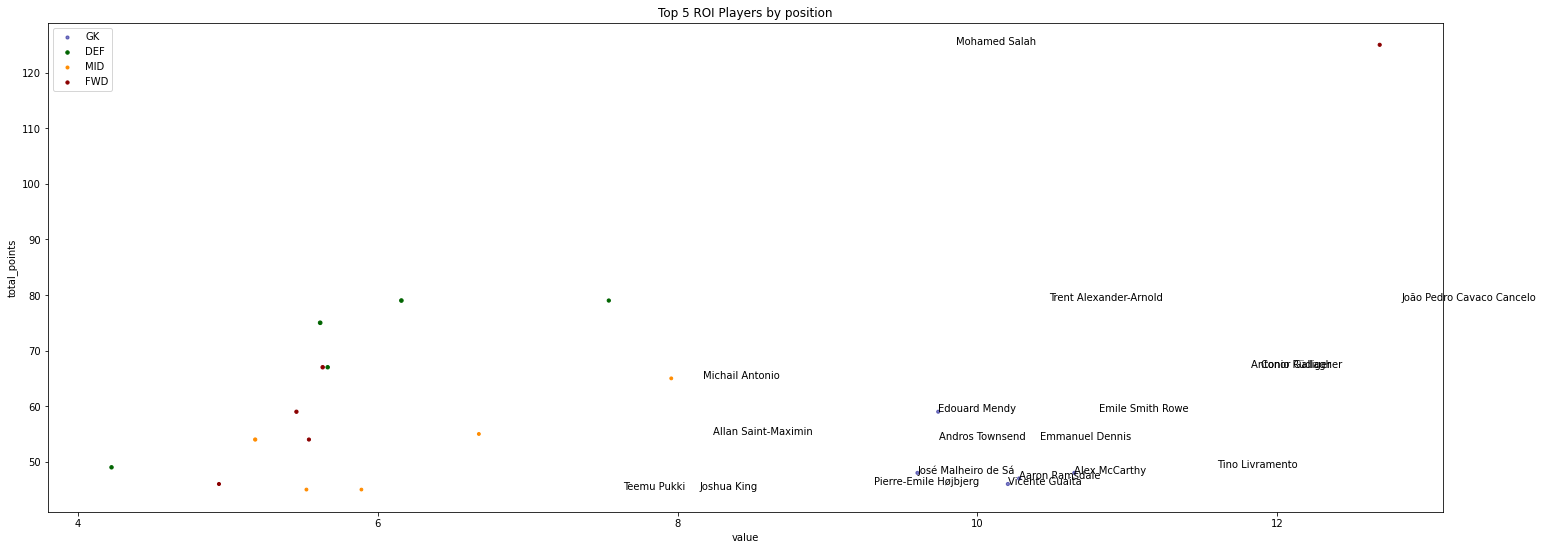

In [53]:
ax = merged_gw_2122_top5_gk.plot.scatter(x='roi', y='total_points', color='DarkBlue', label='GK', s=merged_gw_2122_top5_gk['roi'], alpha=.5, figsize=(25,9), title="Top 5 ROI Players by position")
for i, txt in enumerate(merged_gw_2122_top5_gk.name):
    ax.annotate(txt, (merged_gw_2122_top5_gk.roi.iat[i],merged_gw_2122_top5_gk.total_points.iat[i]))
merged_gw_2122_top5_def.plot.scatter(x='value', y='total_points', color='DarkGreen', label='DEF', s=merged_gw_2122_top5_def['roi'], ax=ax)
for i, txt in enumerate(merged_gw_2122_top5_def.name):
    ax.annotate(txt, (merged_gw_2122_top5_def.roi.iat[i],merged_gw_2122_top5_def.total_points.iat[i]))
merged_gw_2122_top5_fwd.plot.scatter(x='value', y='total_points', color='DarkOrange', label='MID', s=merged_gw_2122_top5_fwd['roi'], ax=ax)
for i, txt in enumerate(merged_gw_2122_top5_fwd.name):
    ax.annotate(txt, (merged_gw_2122_top5_fwd.roi.iat[i],merged_gw_2122_top5_fwd.total_points.iat[i]))
merged_gw_2122_top5_mid.plot.scatter(x='value', y='total_points', color='DarkRed', label='FWD', s=merged_gw_2122_top5_mid['roi'], ax=ax)
for i, txt in enumerate(merged_gw_2122_top5_mid.name):
    ax.annotate(txt, (merged_gw_2122_top5_mid.roi.iat[i],merged_gw_2122_top5_mid.total_points.iat[i]))

In [7]:
# final_decisions_df = pd.read_pickle('final_decisions_df.pkl')
final_decisions_df = final_team_after_transfer
final_decisions_df_copy = final_decisions_df.copy()
final_decisions_df_copy

,GW,captain,cost,expected_score,name,non_sub,position,real_score,sub,team
0,1.0,0.0,4.5,5.460000,Robert Sánchez,1.0,GK,2.0,0.0,Brighton
1,1.0,0.0,4.5,3.613988,Cheikhou Kouyaté,1.0,DEF,1.0,0.0,Crystal Palace
2,1.0,0.0,4.5,3.997563,Oriol Romeu Vidal,1.0,MID,2.0,0.0,Southampton
3,1.0,1.0,12.5,7.500000,Mohamed Salah,1.0,MID,17.0,0.0,Liverpool
4,1.0,0.0,7.0,4.940581,Harvey Barnes,1.0,MID,3.0,0.0,Leicester
...,...,...,...,...,...,...,...,...,...,...
587,12.0,0.0,7.7,2.000000,Trent Alexander-Arnold,1.0,DEF,15.0,0.0,Liverpool
100,12.0,0.0,6.8,1.000000,Che Adams,0.0,FWD,9.0,1.0,Southampton
267,12.0,0.0,10.7,2.733333,Jamie Vardy,1.0,FWD,2.0,0.0,Leicester
503,12.0,0.0,7.7,2.262340,Raúl Jiménez,1.0,FWD,8.0,0.0,Wolves


In [8]:
temp = final_decisions_df_copy.groupby(['name']).count()
temp = temp[temp['GW'] > 3]
temp.sort_values(['GW'], ascending=False)

,GW,captain,cost,expected_score,non_sub,position,real_score,sub,team
name,,,,,,,,,
Trent Alexander-Arnold,12,12,12,12,12,12,12,12,12
Che Adams,12,12,12,12,12,12,12,12,12
David de Gea,12,12,12,12,12,12,12,12,12
Robert Sánchez,12,12,12,12,12,12,12,12,12
Jamie Vardy,12,12,12,12,12,12,12,12,12
Antonio Rüdiger,12,12,12,12,12,12,12,12,12
Oriol Romeu Vidal,12,12,12,12,12,12,12,12,12
Mohamed Salah,12,12,12,12,12,12,12,12,12
Rúben Santos Gato Alves Dias,10,10,10,10,10,10,10,10,10


In [9]:
# temp = final_decisions_df_copy.groupby(['name']).sum()
# temp = temp[temp['GW'] > 5]
# temp.sort_values(['GW'], ascending=False)

final_decisions_df_copy_gk = final_decisions_df_copy[final_decisions_df_copy['position'] == 'GK']
final_decisions_df_copy_mid = final_decisions_df_copy[final_decisions_df_copy['position'] == 'MID']
final_decisions_df_copy_def = final_decisions_df_copy[final_decisions_df_copy['position'] == 'DEF']
final_decisions_df_copy_fwd = final_decisions_df_copy[final_decisions_df_copy['position'] == 'FWD']


In [10]:
final_decisions_df_copy_gk

,GW,captain,cost,expected_score,name,non_sub,position,real_score,sub,team
0,1.0,0.0,4.5,5.460000,Robert Sánchez,1.0,GK,2.0,0.0,Brighton
11,1.0,0.0,5.0,5.460000,David de Gea,0.0,GK,2.0,1.0,Man Utd
129,2.0,0.0,5.0,2.838333,David de Gea,0.0,GK,3.0,1.0,Man Utd
458,2.0,0.0,4.5,2.881667,Robert Sánchez,1.0,GK,6.0,0.0,Brighton
132,3.0,0.0,5.0,2.838333,David de Gea,0.0,GK,7.0,1.0,Man Utd
468,3.0,0.0,4.5,5.460000,Robert Sánchez,1.0,GK,2.0,0.0,Brighton
136,4.0,0.0,5.0,4.853333,David de Gea,0.0,GK,2.0,1.0,Man Utd
479,4.0,0.0,4.5,2.881667,Robert Sánchez,1.0,GK,6.0,0.0,Brighton
140,5.0,0.0,5.0,2.838333,David de Gea,0.0,GK,10.0,1.0,Man Utd
495,5.0,0.0,4.5,3.206667,Robert Sánchez,1.0,GK,1.0,0.0,Brighton


In [11]:
final_decisions_df_copy_gk = final_decisions_df_copy_gk.groupby(['GW']).sum()
final_decisions_df_copy_mid = final_decisions_df_copy_mid.groupby(['GW']).sum()
final_decisions_df_copy_def = final_decisions_df_copy_def.groupby(['GW']).sum()
final_decisions_df_copy_fwd = final_decisions_df_copy_fwd.groupby(['GW']).sum()

In [12]:
final_decisions_df_copy_new = pd.DataFrame()
final_decisions_df_copy_new['GK_Score'] = final_decisions_df_copy_gk['expected_score']
final_decisions_df_copy_new['MID_Score'] = final_decisions_df_copy_mid['expected_score']
final_decisions_df_copy_new['DEF_Score'] = final_decisions_df_copy_def['expected_score']
final_decisions_df_copy_new['FWD_Score'] = final_decisions_df_copy_fwd['expected_score']
final_decisions_df_copy_new

,GK_Score,MID_Score,DEF_Score,FWD_Score
GW,,,,
1.0,10.920000,22.203215,18.380655,11.233333
2.0,5.720000,25.418258,15.000000,17.675013
3.0,8.298333,16.694971,20.966667,18.827500
4.0,7.735000,23.170790,13.633333,19.210356
5.0,6.045000,19.379706,20.866667,14.400896
6.0,6.803333,24.245692,22.933333,14.694708
7.0,5.633333,22.891507,26.266667,14.418101
8.0,5.633333,23.518448,18.000000,10.071745
9.0,8.060000,25.067671,19.500000,11.942558


In [13]:
final_decisions_df_copy_new['total'] = final_decisions_df_copy_new['GK_Score'] + final_decisions_df_copy_new['MID_Score'] +final_decisions_df_copy_new['FWD_Score'] + final_decisions_df_copy_new['DEF_Score']
final_decisions_df_copy_new

,GK_Score,MID_Score,DEF_Score,FWD_Score,total
GW,,,,,
1.0,10.920000,22.203215,18.380655,11.233333,62.737203
2.0,5.720000,25.418258,15.000000,17.675013,63.813271
3.0,8.298333,16.694971,20.966667,18.827500,64.787471
4.0,7.735000,23.170790,13.633333,19.210356,63.749479
5.0,6.045000,19.379706,20.866667,14.400896,60.692269
6.0,6.803333,24.245692,22.933333,14.694708,68.677067
7.0,5.633333,22.891507,26.266667,14.418101,69.209609
8.0,5.633333,23.518448,18.000000,10.071745,57.223526
9.0,8.060000,25.067671,19.500000,11.942558,64.570230


In [14]:
final_decisions_df_copy_new = final_decisions_df_copy_new.reset_index()

In [15]:
final_decisions_df_copy_new

,GW,GK_Score,MID_Score,DEF_Score,FWD_Score,total
0,1.0,10.920000,22.203215,18.380655,11.233333,62.737203
1,2.0,5.720000,25.418258,15.000000,17.675013,63.813271
2,3.0,8.298333,16.694971,20.966667,18.827500,64.787471
3,4.0,7.735000,23.170790,13.633333,19.210356,63.749479
4,5.0,6.045000,19.379706,20.866667,14.400896,60.692269
5,6.0,6.803333,24.245692,22.933333,14.694708,68.677067
6,7.0,5.633333,22.891507,26.266667,14.418101,69.209609
7,8.0,5.633333,23.518448,18.000000,10.071745,57.223526
8,9.0,8.060000,25.067671,19.500000,11.942558,64.570230
9,10.0,5.980000,25.286545,19.733333,10.000316,61.000194


In [16]:
final_decisions_df_copy_new = final_decisions_df_copy_new.drop('total', axis = 1)

Text(0, 0.5, 'Predicted Scores')

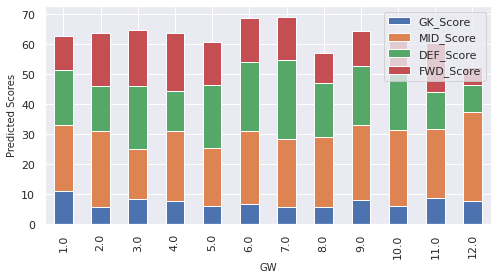

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("husl", 8)
sns.set(style='white')
sns.set(rc = {'figure.figsize':(8,4)})
p = final_decisions_df_copy_new.set_index('GW').plot(kind='bar', stacked=True)
p.set_xlabel("GW", fontsize = 10)
p.set_ylabel("Predicted Scores", fontsize = 10)

In [65]:
merged_gw_2122 = pd.read_csv('merged_gw_2122.csv')
merged_gw_2122

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Eric Bailly,DEF,Man Utd,0.0,0,0,0,0,0.0,286,6,0,0,0.0,0.0,2021-08-14T11:30:00Z,0,10,0,0,0,0,1,0,9363,1,5,0.0,0,0,0,0,50,True,0,1
1,Keinan Davis,FWD,Aston Villa,0.4,0,0,0,0,0.0,49,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,18,0,0,0,0,1,0,169789,2,3,0.0,0,0,0,0,45,False,0,1
2,Ayotomiwa Dele-Bashiru,MID,Watford,0.0,0,0,0,0,0.0,394,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,2,0,0,0,0,1,0,4092,2,3,0.0,0,0,0,0,45,True,0,1
3,James Ward-Prowse,MID,Southampton,2.3,0,0,20,0,30.5,341,4,3,0,5.2,21.6,2021-08-14T14:00:00Z,90,8,0,0,0,0,1,0,299682,1,3,0.0,2,0,0,0,65,False,0,1
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,6,1,3,20.1,106.2,2021-08-14T11:30:00Z,90,10,0,0,0,0,1,0,3381004,1,5,59.0,20,0,0,0,120,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7234,Wilfred Ndidi,MID,Leicester,-0.2,0,0,7,0,1.7,216,113,3,0,1.3,11.0,2021-11-20T12:30:00Z,90,6,0,0,0,0,12,0,77670,3,0,0.0,2,492,2230,1738,48,True,0,12
7235,Matt Ritchie,DEF,Newcastle,1.3,1,0,22,0,44.7,292,116,3,0,7.5,30.6,2021-11-20T15:00:00Z,90,3,0,0,0,0,12,0,22693,3,3,0.0,4,2632,4023,1391,49,True,0,12
7236,Nathan Redmond,MID,Southampton,2.5,0,0,0,0,0.0,336,117,0,0,0.0,0.0,2021-11-20T15:00:00Z,0,15,0,0,0,0,12,0,24704,1,2,0.0,0,-8325,1335,9660,59,False,0,12
7237,Mathew Ryan,GK,Brighton,0.0,0,0,0,0,0.0,65,111,0,0,0.0,0.0,2021-11-20T15:00:00Z,0,2,0,0,0,0,12,0,673,0,2,0.0,0,-13,0,13,45,False,0,12


In [66]:
test12 = len(merged_gw_2122[merged_gw_2122['name'].str.contains('Salah')].index)
test12

12

In [84]:
# player_names = ['Gea', 'Chilwell', 'Vardy','Fernandes','Salah','Arnold','Cancelo', 'Livramento', 'Antonio','Ronaldo']
# correct_names = []
# for p in player_names:
#   if len(merged_gw_2122[merged_gw_2122['name'].str.contains(p)].index) > 0:
#     correct_name = merged_gw_2122[merged_gw_2122['name'].str.contains(p)].values[0][0]
#     correct_names.append(correct_name)

# print(correct_names)

correct_names = ['Antonio Rüdiger',
 'Davinson Sánchez',
 'Jamie Vardy',
 'João Pedro Cavaco Cancelo',
 'Leandro Trossard',
 'Michail Antonio',
 'Mohamed Salah',
 'Oriol Romeu Vidal',
 'Robert Sánchez',
 'Rúben Santos Gato Alves Dias',
 'Trent Alexander-Arnold',
'Bruno Miguel Borges Fernandes',
'David de Gea']
 
print(correct_names)
    

['Antonio Rüdiger', 'Davinson Sánchez', 'Jamie Vardy', 'João Pedro Cavaco Cancelo', 'Leandro Trossard', 'Michail Antonio', 'Mohamed Salah', 'Oriol Romeu Vidal', 'Robert Sánchez', 'Rúben Santos Gato Alves Dias', 'Trent Alexander-Arnold', 'Bruno Miguel Borges Fernandes', 'David de Gea']


In [85]:
merged_gw_2122_fewplayers = merged_gw_2122[merged_gw_2122.name.isin(correct_names)]
merged_gw_2122_fewplayers

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,6,1,3,20.1,106.2,2021-08-14T11:30:00Z,90,10,0,0,0,0,1,0,3381004,1,5,59.0,20,0,0,0,120,True,0,1
72,Leandro Trossard,MID,Brighton,2.8,0,0,4,0,1.9,64,2,1,0,1.2,2.2,2021-08-14T14:00:00Z,75,5,0,0,0,0,1,0,88156,2,1,8.0,2,0,0,0,65,False,0,1
108,João Pedro Cavaco Cancelo,DEF,Man City,3.4,0,0,21,0,38.5,256,10,1,0,7.2,21.2,2021-08-15T15:30:00Z,90,17,0,0,0,0,1,0,484049,0,1,12.0,2,0,0,0,60,False,0,1
146,Mohamed Salah,MID,Liverpool,5.0,2,3,49,1,36.4,233,7,0,1,17.7,70.6,2021-08-14T16:30:00Z,90,15,0,0,0,0,1,0,3548693,3,0,70.0,17,0,0,0,125,False,0,1
150,Robert Sánchez,GK,Brighton,2.3,0,0,19,0,10.0,69,2,1,0,3.0,20.0,2021-08-14T14:00:00Z,90,5,0,0,0,0,1,2,1701303,2,1,0.0,2,0,0,0,45,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,Jamie Vardy,FWD,Leicester,0.5,0,0,0,0,1.5,205,113,3,0,0.7,0.0,2021-11-20T12:30:00Z,90,6,0,0,0,0,12,0,2293153,3,0,8.0,2,-329398,76131,405529,107,True,0,12
7050,Trent Alexander-Arnold,DEF,Liverpool,10.0,2,3,55,1,51.1,237,114,0,0,14.3,46.8,2021-11-20T17:30:00Z,90,1,0,0,0,0,12,0,2657544,0,4,45.0,15,180441,199872,19431,77,True,0,12
7062,Rúben Santos Gato Alves Dias,DEF,Man City,3.2,0,0,0,0,0.0,262,115,0,0,0.0,0.0,2021-11-21T14:00:00Z,0,8,0,0,0,0,12,0,2200005,0,3,0.0,0,-66082,29953,96035,61,True,0,12
7145,David de Gea,GK,Man Utd,4.8,0,0,25,0,0.0,270,119,4,0,4.2,42.2,2021-11-20T15:00:00Z,90,18,0,0,1,0,12,3,469831,1,4,0.0,6,9825,28515,18690,50,False,0,12


In [99]:
correct_names

['Antonio Rüdiger',
 'Davinson Sánchez',
 'Jamie Vardy',
 'João Pedro Cavaco Cancelo',
 'Leandro Trossard',
 'Michail Antonio',
 'Mohamed Salah',
 'Oriol Romeu Vidal',
 'Robert Sánchez',
 'Rúben Santos Gato Alves Dias',
 'Trent Alexander-Arnold',
 'Bruno Miguel Borges Fernandes',
 'David de Gea']

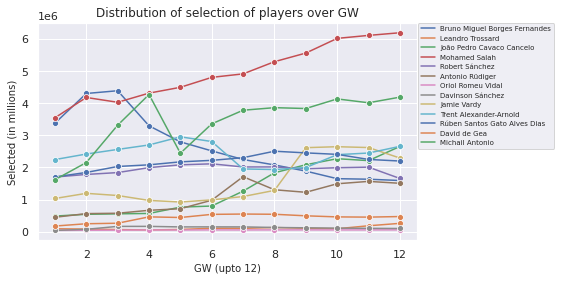

In [97]:
sns.set(rc = {'figure.figsize':(8,4)})
# sns.color_palette("husl", 8)
# ("husl", 8)
# sns.lineplot(data=merged_gw_2122_fewplayers, x="GW", y="selected", hue="name")
fig, ax1 = plt.subplots(1,1)
g = sns.lineplot(data=merged_gw_2122_fewplayers, x="GW", y="selected", hue="name",marker='o',palette='deep')
box = g.get_position()
g.set(title='Distribution of selection of players over GW')
g.set_position([box.x0, box.y0, box.width * 0.85, box.height])
g.legend(loc='center right', bbox_to_anchor=(1.37, 0.71), ncol=1,prop={'size': 7})
g.set_xlabel("GW (upto 12)", fontsize = 10)
g.set_ylabel("Selected (in millions)", fontsize = 10)
plt.show()

In [108]:
ashley_nov29 = pd.read_pickle('ashley_nov29.pkl')
ashley_nov29

,name,assists,goals_scored,goals_conceded,ict_index,influence,creativity,threat,value,saves,minutes,penalties_saved,bonus,yellow_cards,red_cards,clean_sheets,bps,position,total_points,predicted_score_rf,team,GW
0,Adrián San Miguel del Castillo,0.000000,0.000000,2.092501,0.000,0.000,0.000,0.00,45.0,2.601501,78.447533,0.000000,0.0,1.0,0.0,0.0,12.0,GK,0.0,1.278333,Liverpool,1.0
1,David de Gea,0.000000,0.000000,1.008346,1.300,13.200,0.000,0.00,50.0,2.128800,80.005715,0.000000,1.0,0.0,0.0,1.0,16.0,GK,2.0,5.460000,Man Utd,1.0
2,Fraser Forster,0.000000,0.000000,1.205943,0.000,0.000,0.000,0.00,45.0,1.968972,68.200692,0.076339,0.0,0.0,0.0,0.0,4.5,GK,0.0,2.686667,Southampton,1.0
3,Hugo Lloris,0.000000,0.000000,1.098763,3.200,31.800,0.000,0.00,55.0,3.154852,89.006861,0.017579,0.0,0.0,0.0,1.0,3.0,GK,10.0,4.853333,Spurs,1.0
4,Kasper Schmeichel,0.000000,0.000000,1.264840,2.600,26.000,0.000,0.00,50.0,2.440746,89.961197,0.015237,0.0,0.0,0.0,0.0,6.0,GK,9.0,2.730000,Leicester,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Tammy Abraham,0.065126,0.178042,0.392689,0.000,0.000,0.000,0.00,65.0,0.000000,29.610266,0.000000,0.0,0.0,0.0,0.0,0.0,FWD,0.0,1.000000,Chelsea,12.0
570,Teemu Pukki,0.000000,0.070000,0.700000,2.622,4.958,4.012,17.28,58.0,0.000000,59.000000,0.000000,0.0,0.0,0.0,0.0,9.4,FWD,8.0,1.000000,Norwich,12.0
576,Timo Werner,0.131092,0.135546,0.386807,3.916,4.126,8.873,26.21,86.0,0.000000,40.981513,0.000000,0.0,0.0,0.0,0.0,5.8,FWD,0.0,1.000000,Chelsea,12.0
589,Troy Deeney,0.000000,0.000000,0.000000,0.130,1.300,0.195,0.00,54.0,0.000000,29.250000,0.000000,0.0,0.0,0.0,0.0,0.0,FWD,0.0,1.000000,Watford,12.0


In [112]:
correct_names2 = ['Antonio Rüdiger',
 'Jamie Vardy',
 'Michail Antonio',
 'Mohamed Salah',
 'Oriol Romeu Vidal',
 'Robert Sánchez',
 'Rúben Santos Gato Alves Dias',
 'Trent Alexander-Arnold']

merged_gw_2122_fewplayers2 = ashley_nov29[ashley_nov29.name.isin(correct_names2)]


In [115]:
merged_gw_2122_fewplayers2 = merged_gw_2122_fewplayers2.reset_index()

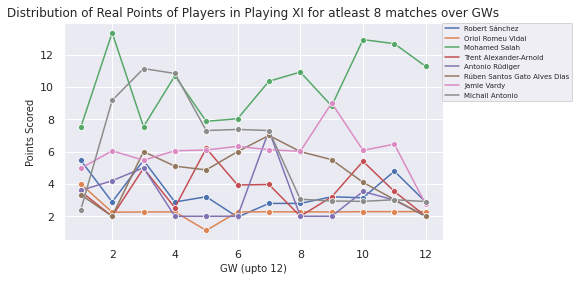

In [120]:
sns.set(rc = {'figure.figsize':(8,4)})
# sns.color_palette("husl", 8)
# ("husl", 8)
# sns.lineplot(data=merged_gw_2122_fewplayers, x="GW", y="selected", hue="name")
fig, ax1 = plt.subplots(1,1)
g = sns.lineplot(data=merged_gw_2122_fewplayers2, x="GW", y="predicted_score_rf", hue="name",marker='o',palette='deep')
box = g.get_position()
g.set(title='Distribution of Real Points of Players in Playing XI for atleast 8 matches over GWs')
g.set_position([box.x0, box.y0, box.width * 0.85, box.height])
g.legend(loc='center right', bbox_to_anchor=(1.35, 0.82), ncol=1,prop={'size': 7})
g.set_xlabel("GW (upto 12)", fontsize = 10)
g.set_ylabel("Points Scored", fontsize = 10)
plt.show()

In [70]:
final_decisions_df_copy

,GW,captain,cost,expected_score,name,non_sub,position,real_score,sub,team
0,1.0,0.0,4.5,5.460000,Robert Sánchez,1.0,GK,2.0,0.0,Brighton
1,1.0,0.0,4.5,3.613988,Cheikhou Kouyaté,1.0,DEF,1.0,0.0,Crystal Palace
2,1.0,0.0,4.5,3.997563,Oriol Romeu Vidal,1.0,MID,2.0,0.0,Southampton
3,1.0,1.0,12.5,7.500000,Mohamed Salah,1.0,MID,17.0,0.0,Liverpool
4,1.0,0.0,7.0,4.940581,Harvey Barnes,1.0,MID,3.0,0.0,Leicester
...,...,...,...,...,...,...,...,...,...,...
10,12.0,0.0,5.8,4.333333,Hee-Chan Hwang,1.0,FWD,2.0,0.0,Wolves
11,12.0,0.0,4.9,4.853333,Illan Meslier,0.0,GK,1.0,1.0,Leeds
12,12.0,0.0,4.9,3.500000,Çaglar Söyüncü,0.0,DEF,1.0,1.0,Leicester
13,12.0,0.0,8.2,2.909225,Michail Antonio,0.0,FWD,2.0,1.0,West Ham


In [71]:
all_pred_scores = pd.read_pickle('ashley_nov29.pkl')

In [72]:
# all_pred_scores = all_pred_scores.groupby('GW').agg({'total_points':'sum','predicted_score_rf':'sum'})
all_pred_scores

,name,assists,goals_scored,goals_conceded,ict_index,influence,creativity,threat,value,saves,minutes,penalties_saved,bonus,yellow_cards,red_cards,clean_sheets,bps,position,total_points,predicted_score_rf,team,GW
0,Adrián San Miguel del Castillo,0.000000,0.000000,2.092501,0.000,0.000,0.000,0.00,45.0,2.601501,78.447533,0.000000,0.0,1.0,0.0,0.0,12.0,GK,0.0,1.278333,Liverpool,1.0
1,David de Gea,0.000000,0.000000,1.008346,1.300,13.200,0.000,0.00,50.0,2.128800,80.005715,0.000000,1.0,0.0,0.0,1.0,16.0,GK,2.0,5.460000,Man Utd,1.0
2,Fraser Forster,0.000000,0.000000,1.205943,0.000,0.000,0.000,0.00,45.0,1.968972,68.200692,0.076339,0.0,0.0,0.0,0.0,4.5,GK,0.0,2.686667,Southampton,1.0
3,Hugo Lloris,0.000000,0.000000,1.098763,3.200,31.800,0.000,0.00,55.0,3.154852,89.006861,0.017579,0.0,0.0,0.0,1.0,3.0,GK,10.0,4.853333,Spurs,1.0
4,Kasper Schmeichel,0.000000,0.000000,1.264840,2.600,26.000,0.000,0.00,50.0,2.440746,89.961197,0.015237,0.0,0.0,0.0,0.0,6.0,GK,9.0,2.730000,Leicester,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Tammy Abraham,0.065126,0.178042,0.392689,0.000,0.000,0.000,0.00,65.0,0.000000,29.610266,0.000000,0.0,0.0,0.0,0.0,0.0,FWD,0.0,1.000000,Chelsea,12.0
570,Teemu Pukki,0.000000,0.070000,0.700000,2.622,4.958,4.012,17.28,58.0,0.000000,59.000000,0.000000,0.0,0.0,0.0,0.0,9.4,FWD,8.0,1.000000,Norwich,12.0
576,Timo Werner,0.131092,0.135546,0.386807,3.916,4.126,8.873,26.21,86.0,0.000000,40.981513,0.000000,0.0,0.0,0.0,0.0,5.8,FWD,0.0,1.000000,Chelsea,12.0
589,Troy Deeney,0.000000,0.000000,0.000000,0.130,1.300,0.195,0.00,54.0,0.000000,29.250000,0.000000,0.0,0.0,0.0,0.0,0.0,FWD,0.0,1.000000,Watford,12.0


In [73]:
all_pred_scores['predicted_scores_pred_model_rmse'] = math.sqrt(mean_squared_error(all_pred_scores['total_points'], all_pred_scores['predicted_score_rf']))

In [74]:
all_pred_scores

,name,assists,goals_scored,goals_conceded,ict_index,influence,creativity,threat,value,saves,minutes,penalties_saved,bonus,yellow_cards,red_cards,clean_sheets,bps,position,total_points,predicted_score_rf,team,GW,predicted_scores_pred_model_rmse
0,Adrián San Miguel del Castillo,0.000000,0.000000,2.092501,0.000,0.000,0.000,0.00,45.0,2.601501,78.447533,0.000000,0.0,1.0,0.0,0.0,12.0,GK,0.0,1.278333,Liverpool,1.0,2.515412
1,David de Gea,0.000000,0.000000,1.008346,1.300,13.200,0.000,0.00,50.0,2.128800,80.005715,0.000000,1.0,0.0,0.0,1.0,16.0,GK,2.0,5.460000,Man Utd,1.0,2.515412
2,Fraser Forster,0.000000,0.000000,1.205943,0.000,0.000,0.000,0.00,45.0,1.968972,68.200692,0.076339,0.0,0.0,0.0,0.0,4.5,GK,0.0,2.686667,Southampton,1.0,2.515412
3,Hugo Lloris,0.000000,0.000000,1.098763,3.200,31.800,0.000,0.00,55.0,3.154852,89.006861,0.017579,0.0,0.0,0.0,1.0,3.0,GK,10.0,4.853333,Spurs,1.0,2.515412
4,Kasper Schmeichel,0.000000,0.000000,1.264840,2.600,26.000,0.000,0.00,50.0,2.440746,89.961197,0.015237,0.0,0.0,0.0,0.0,6.0,GK,9.0,2.730000,Leicester,1.0,2.515412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Tammy Abraham,0.065126,0.178042,0.392689,0.000,0.000,0.000,0.00,65.0,0.000000,29.610266,0.000000,0.0,0.0,0.0,0.0,0.0,FWD,0.0,1.000000,Chelsea,12.0,2.515412
570,Teemu Pukki,0.000000,0.070000,0.700000,2.622,4.958,4.012,17.28,58.0,0.000000,59.000000,0.000000,0.0,0.0,0.0,0.0,9.4,FWD,8.0,1.000000,Norwich,12.0,2.515412
576,Timo Werner,0.131092,0.135546,0.386807,3.916,4.126,8.873,26.21,86.0,0.000000,40.981513,0.000000,0.0,0.0,0.0,0.0,5.8,FWD,0.0,1.000000,Chelsea,12.0,2.515412
589,Troy Deeney,0.000000,0.000000,0.000000,0.130,1.300,0.195,0.00,54.0,0.000000,29.250000,0.000000,0.0,0.0,0.0,0.0,0.0,FWD,0.0,1.000000,Watford,12.0,2.515412


In [75]:
merged_gw_2122[merged_gw_2122['name'].str.contains('Salah')]['ict_index']

146     17.7
704     11.1
1273    14.0
1855    17.7
2454    19.7
3060     9.8
3671    15.7
4284    18.6
4902    24.5
5521    10.4
6144     8.3
6772    15.8
Name: ict_index, dtype: float64

In [76]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[0.3,1, 0.8, 1.3, 18],
    theta=['xA','A','xG',
           'G', 'ict_index']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

In [6]:
final_team_after_transfer = pd.read_pickle('final_team_after_transfer.pkl')
final_team_after_transfer

,GW,captain,cost,expected_score,name,non_sub,position,real_score,sub,team
0,1.0,0.0,4.5,5.460000,Robert Sánchez,1.0,GK,2.0,0.0,Brighton
1,1.0,0.0,4.5,3.613988,Cheikhou Kouyaté,1.0,DEF,1.0,0.0,Crystal Palace
2,1.0,0.0,4.5,3.997563,Oriol Romeu Vidal,1.0,MID,2.0,0.0,Southampton
3,1.0,1.0,12.5,7.500000,Mohamed Salah,1.0,MID,17.0,0.0,Liverpool
4,1.0,0.0,7.0,4.940581,Harvey Barnes,1.0,MID,3.0,0.0,Leicester
...,...,...,...,...,...,...,...,...,...,...
587,12.0,0.0,7.7,2.000000,Trent Alexander-Arnold,1.0,DEF,15.0,0.0,Liverpool
100,12.0,0.0,6.8,1.000000,Che Adams,0.0,FWD,9.0,1.0,Southampton
267,12.0,0.0,10.7,2.733333,Jamie Vardy,1.0,FWD,2.0,0.0,Leicester
503,12.0,0.0,7.7,2.262340,Raúl Jiménez,1.0,FWD,8.0,0.0,Wolves


In [78]:
teams = []
for i in range(1,13):
  temp = final_team_after_transfer[final_team_after_transfer['GW'] == i]
  teams.append(temp['name'].values)

for i in range(0,len(teams)):
  print('GW ' + str(i+1) + ' Team:')
  print(teams[i])

GW 1 Team:
['Robert Sánchez' 'Cheikhou Kouyaté' 'Oriol Romeu Vidal' 'Mohamed Salah'
 'Harvey Barnes' 'Trent Alexander-Arnold' 'Antonio Rüdiger'
 'Davinson Sánchez' 'Ben White' 'Jamie Vardy' 'Kelechi Iheanacho'
 'David de Gea' 'Abdoulaye Doucouré' 'Ashley Westwood' 'Che Adams']
GW 2 Team:
['David de Gea' 'Robert Sánchez' 'Abdoulaye Doucouré' 'Ashley Westwood'
 'Harvey Barnes' 'Mohamed Salah' 'Oriol Romeu Vidal' 'Antonio Rüdiger'
 'Ben White' 'Cheikhou Kouyaté' 'Davinson Sánchez'
 'Trent Alexander-Arnold' 'Che Adams' 'Jamie Vardy' 'Michail Antonio']
GW 3 Team:
['David de Gea' 'Robert Sánchez' 'Abdoulaye Doucouré' 'Ashley Westwood'
 'Harvey Barnes' 'Mohamed Salah' 'Oriol Romeu Vidal' 'Antonio Rüdiger'
 'Cheikhou Kouyaté' 'Davinson Sánchez' 'Trent Alexander-Arnold'
 'Che Adams' 'Jamie Vardy' 'Michail Antonio'
 'Rúben Santos Gato Alves Dias']
GW 4 Team:
['David de Gea' 'Robert Sánchez' 'Abdoulaye Doucouré' 'Ashley Westwood'
 'Mohamed Salah' 'Oriol Romeu Vidal' 'Antonio Rüdiger' 'Cheikhou Ko